In [1]:
from arachne import FloatTensor, Linear, Pipeline, Relu, MSELoss, SGD, IntPair
import matplotlib.pyplot as plt

In [2]:
dat = FloatTensor.readCSV("WineQT.csv")

# Read the CSV file
dat = FloatTensor.readCSV("WineQT.csv")

# Normalize the data
dat = dat.Normalize()

# Split the data into input and output
ind = [11]
vals = dat.input_output_split(ind)
input = vals[0]
output = vals[1]

# Split the input and output into rows
input_list = input.row_split()
output_list = output.row_split()

# Create the pipeline
myPipeline = Pipeline()
size = IntPair(1,12)
q = Linear(size,6)
r = Relu(IntPair(1,6))
d = Linear(IntPair(1,6),3)
e = Relu(IntPair(1,3))
f = Linear(IntPair(1,3),1)
g = Relu(IntPair(1,1))
# Add the layers to the pipeline
myPipeline.add(q)
myPipeline.add(r)
myPipeline.add(d)
myPipeline.add(e)
myPipeline.add(f)
myPipeline.add(g)

# Print the pipeline
myPipeline.printPipeline()

# Create the optimizer
optimizer = SGD(1e-4)

a = MSELoss()

Layer		Input		Output		Parameter Count
Linear 1:		(1,12)		(1,6)		72
relu 1:		(1,6)		(1,6)		0
Linear 2:		(1,6)		(1,3)		18
relu 2:		(1,3)		(1,3)		0
Linear 3:		(1,3)		(1,1)		3
relu 3:		(1,1)		(1,1)		0
Total Parameter Count:	93


In [3]:
losses = []
# Train the model
for j in range(1000):
    for i in range(len(input_list)):
        prediction = myPipeline.forwardFloat(input_list[i])

        loss = (a.loss(prediction, output_list[i]))

        myPipeline.backward(optimizer, a, output_list[i])
    print(f"Epoch {j+1}, Loss: {loss}")
    losses.append(loss)

Epoch 1, Loss: 1.1398779153823853
Epoch 2, Loss: 0.6061683893203735
Epoch 3, Loss: 0.4146265983581543
Epoch 4, Loss: 0.31484219431877136
Epoch 5, Loss: 0.25325673818588257
Epoch 6, Loss: 0.21130947768688202
Epoch 7, Loss: 0.18082602322101593
Epoch 8, Loss: 0.15762744843959808
Epoch 9, Loss: 0.13935692608356476
Epoch 10, Loss: 0.12457526475191116
Epoch 11, Loss: 0.11235839128494263
Epoch 12, Loss: 0.10208302736282349
Epoch 13, Loss: 0.09331116825342178
Epoch 14, Loss: 0.0857299417257309
Epoch 15, Loss: 0.0791068747639656
Epoch 16, Loss: 0.07326845824718475
Epoch 17, Loss: 0.06807857006788254
Epoch 18, Loss: 0.06343105435371399
Epoch 19, Loss: 0.05924341827630997
Epoch 20, Loss: 0.055447593331336975
Epoch 21, Loss: 0.05198908969759941
Epoch 22, Loss: 0.04882284253835678
Epoch 23, Loss: 0.04591146484017372
Epoch 24, Loss: 0.04322420060634613
Epoch 25, Loss: 0.04073452949523926
Epoch 26, Loss: 0.038420792669057846
Epoch 27, Loss: 0.03626300022006035
Epoch 28, Loss: 0.03424578905105591
Epoc

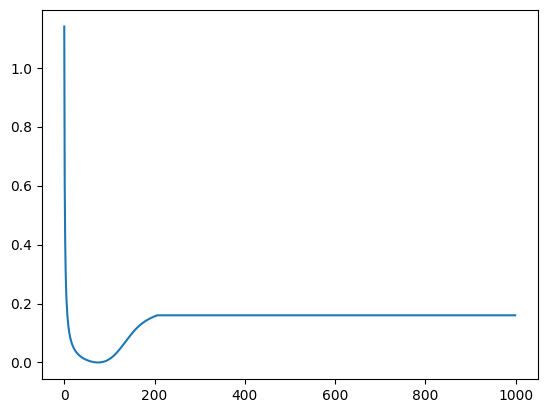

In [4]:
plt.plot(losses)

In [ ]:
del myPipeline